# Project #2: Analyzing Baseball Data

#### This project analyzes the Baseball Data. The project covers the five steps of the Data Analysis process: Question, Wrangle, Explore, Draw Conclusions, Communicate. Both the relevant code and the report of the findings are included in this notebook. 

## Step #1: Question

This analysis will explore how various factors such as fielding, pitching ability, and college attendance relates to annual salary, if at all. This analysis will look at data from 1985 through 2014. 

Specific questions to address: 

1) How has the average salary changed over time? (not adjusting for inflation)

2) What is the relationship, if any, between average salaries and fielding -- as measured by the average number of putouts per player per year? 

3) What is the relationship, if any, between average salaries and average Earned Run Average (ERA) for pitchers?

4) Of the players who earned above the mean salary between 1985 - 2015, what proportion of those players each year had attended at least one year of college? 


### Note: For ease of communication this report will go through the remaining steps of the data analysis process (wrangle, explore, conclusion, and communication) for each individual question. Then, at the end of the report general conclusions on the analysis will be presented. 

### Question #1: How has the average salary changed over time? (not adjusting for inflation)

In [45]:
# Load the Salaries (.csv) data into a dataframe. 
import pandas as pd

salary = pd.read_csv("/Users/mattmessinger/Desktop/Data_Analysis/Project_#2/baseballdatabank-master/core/Salaries.csv")

In [76]:
# create a function to print the first three rows of a dataframe. 
def print_first_three_rows(df): 
    return df.head(3)

In [77]:
# View the first five rows of Salaries dataframe -- one check to ensure the data was imported correctly. 
print_first_three_rows(salary)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000


In [78]:
# View descriptive statistics of the entire Salaries dataframe -- provides a quick, high-level overview. 
salary.describe()

,yearID,salary
count,25575.000000,25575.000000
mean,2000.374389,2008563.024985
std,8.610604,3315706.206379
min,1985.000000,0.000000
25%,1993.000000,275000.000000
50%,2000.000000,550000.000000
75%,2008.000000,2250000.000000
max,2015.000000,33000000.000000


In [90]:
# create a function to find the mean in a dataframe grouped by YearID. 
def find_mean_by_yearID(df): 
    return df.groupby("yearID").mean()

In [82]:
# calculate the average salaries by year from 1985 - 2015 (the range for which salary data is available)
find_mean(salary)

,salary
yearID,
1985,476299
1986,417147
1987,434729
1988,453171
1989,506323
1990,511973
1991,894961
1992,1047520
1993,976966


Populating the interactive namespace from numpy and matplotlib


[<matplotlib.text.Text at 0x11e61b990>, <matplotlib.text.Text at 0x11da72910>]

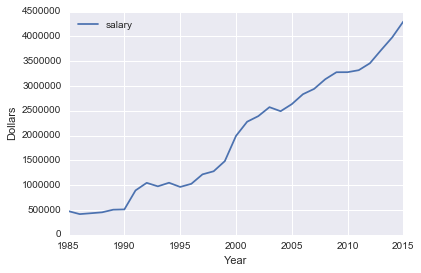

In [98]:
# Plot the average salary between 1985 through 2015. (Not inflation adjusted) 
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

average_annual_salaries_df = find_mean_by_yearID(salary)
average_annual_salaries_df.plot().set(xlabel="Year", ylabel = "Dollars")

#### Conclusions
- During the course of this 30-year period the average salary has increased from 476,299 to 4,301,276: 
- This represents an 803% increase over that time period. 
- By comparison, inflation has increased at a much slower rate, 120% over that time period. 
  (source: http://inflationdata.com/Inflation/Inflation_Calculators/Inflation_Rate_Calculator.asp) 
- This analysis would have been stronger if the dollars represented in the chart would have been adjusted for inflation. 
- The increase in salaries relative to the increase in inflation does seem to indicate that the economics of the baseball industry have improved, but these data are not conclusive. 
- This analysis brings up other interesting questions. Have the teams been increasing their profits at the same/higher/lower rate as the players' salaries have been increasing? How players' salaries relate to team profits would be an intersting question for further study. 

### Question #2: What is the relationship, if any, between average salaries and average fielding results -- as measured by the average number of putouts per player per year?

In [84]:
# Import the Fielding.csv data as a dataframe
fielding_df = pd.read_csv("/Users/mattmessinger/Desktop/Data_Analysis/Project_#2/baseballdatabank-master/core/Fielding.csv")

In [92]:
# Calculate the mean of the various fielding statistics, including "Put Outs" in the "PO" field. 
average_fielding_df = find_mean_by_yearID(fielding_df)
print_first_three_rows(average_fielding_df)

,stint,G,GS,InnOuts,PO,A,E,DP,PB,WP,SB,CS,ZR
yearID,,,,,,,,,,,,,
1871,1.000000,10.735683,NaN,NaN,29.735683,12.907489,8.519824,1.484581,0,NaN,NaN,NaN,NaN
1872,1.077193,12.126316,NaN,NaN,34.589474,14.740351,9.663158,1.561404,0,NaN,NaN,NaN,NaN
1873,1.015152,14.424242,NaN,NaN,40.734848,18.382576,12.015152,2.090909,0,NaN,NaN,NaN,NaN


In [53]:
# Create a dataframe that contains the year index and the average number of put outs. 
average_put_outs_df = average_fielding_df["PO"]
print_first_three_rows(average_put_outs_df)

yearID
1871    29.735683
1872    34.589474
1873    40.734848
Name: PO, dtype: float64

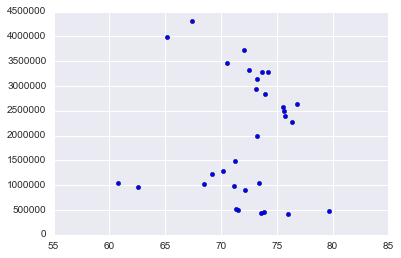

In [116]:
# Slice the put-outs dataframe so that it provides the data for the time period in question, 1985 - 2015. 
# Plot the average put outs and average salary data on a scatterplot to get a visual representation of the nature of the relationship between the two variables. 
average_put_outs_1985_to_2015_df = average_put_outs_df.iloc[114:]
df = plt.scatter(average_put_outs_1985_to_2015_df, average_annual_salaries_df )


In [55]:
# Calculate correlation (Pearson's R) between average put outs and average salary. 
salaries_standard = ((average_annual_salaries_df - average_annual_salaries_df.mean())/average_annual_salaries_df.std(ddof=0)).values
put_outs_standard = ((average_put_outs_1985_to_2015_df - average_put_outs_1985_to_2015_df.mean())/average_put_outs_1985_to_2015_df.std(ddof=0)).values
r = (salaries_standard*put_outs_standard).mean()
print r

-3.23478092503e-18


#### Conclusions
- Both the scatterplot and the extremely low value of r show there is virtually no correlation between average number of put outs and average salary. 
- Intuitively, this makes sense. 
- The purpose of this analysis was to take two variables that intuitively wouldn't be correlated to see if by some unique circumstance the data contradicted intuition. Instead, the data affirmed intuition in that there was very, very little correlation between the two. 
- Another reason this analysis was limited is because the total number of put outs is by definition capped. In a typical, nine-inning game each team has the opportunity to make 27 (9 x 3) put outs. And each year a team typically plays 162 games. Given the relatively low frquency of extra-inning and playoff games when compared to a regular season consisting of 162 games, the number of put outs that can happen in a season is more or less capped. 
- By contrast, there is no theoretical limit on salary growth, although the realities of operating the baseball business do come into play. 
- This was an interesting thought exercise and it's important to remember that sometimes the data do contradict intuition. 


### Question #3) What is the relationship, if any, between average salaries and average Earned Run Average (ERA) for pitchers?

In [56]:
# Import the Pitching.csv data as a dataframe
pitching = pd.read_csv("/Users/mattmessinger/Desktop/Data_Analysis/Project_#2/baseballdatabank-master/core/Pitching.csv")

In [57]:
print_first_three_rows(pitching)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN


In [58]:
print_first_three_rows(salary)

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000


In [59]:
print_first_three_rows(pitching)

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN


In [60]:
# Merge the salary and pitching dataframes to get salaries for those players who have pitched. 
# We assume for this analysis that the vast majority of those who've pitched are pitchers by position. 
pitching.merge(salary,on = ["playerID", "yearID"], how = "inner").head(10)

,playerID,yearID,stint,teamID_x,lgID_x,W,L,G,GS,CG,...,BK,BFP,GF,R,SH,SF,GIDP,teamID_y,lgID_y,salary
0,ackerji01,1985,1,TOR,AL,7,2,61,0,0,...,0,370,26,35,NaN,NaN,NaN,TOR,AL,170000
1,agostju01,1985,1,CHA,AL,4,3,54,0,0,...,0,246,21,27,NaN,NaN,NaN,CHA,AL,147500
2,alexado01,1985,1,TOR,AL,17,10,36,36,6,...,0,1090,0,105,NaN,NaN,NaN,TOR,AL,875000
3,allenne01,1985,2,NYA,AL,1,0,17,0,0,...,0,124,10,9,NaN,NaN,NaN,SLN,NL,750000
4,allenne01,1985,1,SLN,NL,1,4,23,1,0,...,1,135,13,22,NaN,NaN,NaN,SLN,NL,750000
5,anderla02,1985,1,PHI,NL,3,3,57,0,0,...,1,318,19,41,NaN,NaN,NaN,PHI,NL,250500
6,andujjo01,1985,1,SLN,NL,21,12,38,38,10,...,0,1127,0,113,NaN,NaN,NaN,SLN,NL,1030000
7,atherke01,1985,1,OAK,AL,4,7,56,0,0,...,0,435,21,51,NaN,NaN,NaN,OAK,AL,107333
8,bannifl01,1985,1,CHA,AL,10,14,34,34,4,...,0,928,0,121,NaN,NaN,NaN,CHA,AL,811250
9,barkele01,1985,1,ATL,NL,2,9,20,18,0,...,0,335,1,55,NaN,NaN,NaN,ATL,NL,870000


In [61]:
# place the dataframe into the "pitching_salaries" variable. 
pitching_salaries = pitching.merge(salary,on = ["playerID", "yearID"], how = "inner")

In [93]:
# calculate the means for all of the relevant data in the dataframe. 
find_mean_by_yearID(pitching_salaries).head(10)

,stint,W,L,G,GS,CG,SHO,SV,IPouts,H,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
yearID,,,,,,,,,,,,,,,,,,,,,
1985,1.064103,7.508547,7.128205,35.833333,15.029915,2.517094,0.653846,3.444444,383.722222,123.175214,...,3.534188,2.205128,0.696581,540.675214,11.123932,59.123932,NaN,NaN,NaN,462030.316239
1986,1.106936,5.855491,5.673410,31.092486,11.517341,1.632948,0.390173,2.858382,306.208092,98.968208,...,3.471098,2.167630,0.731214,434.343931,9.679191,49.320809,NaN,NaN,NaN,391221.089595
1987,1.112245,5.904762,5.605442,31.955782,11.639456,1.629252,0.418367,2.819728,306.836735,101.384354,...,3.387755,2.146259,0.887755,437.687075,9.557823,51.741497,NaN,NaN,NaN,416934.003401
1988,1.074830,6.248299,6.023810,31.312925,12.551020,1.965986,0.571429,3.312925,326.112245,103.455782,...,3.455782,2.673469,2.588435,458.149660,9.880952,49.159864,NaN,NaN,NaN,434296.299320
1989,1.094675,5.801775,5.618343,31.473373,11.571006,1.384615,0.431953,3.082840,304.952663,96.405325,...,3.396450,2.079882,1.103550,429.005917,9.707101,45.340237,NaN,NaN,NaN,482678.346154
1990,1.087940,4.874372,4.773869,28.138191,9.603015,1.017588,0.334171,2.597990,254.778894,82.914573,...,3.020101,1.839196,0.640704,361.555276,8.366834,40.103015,NaN,NaN,NaN,485947.248744
1991,1.062305,5.626168,5.439252,33.059190,11.161994,1.059190,0.305296,3.152648,294.451713,94.074766,...,3.342679,2.314642,0.651090,416.043614,9.828660,45.953271,NaN,NaN,NaN,893026.495327
1992,1.092958,5.363380,5.323944,32.673239,10.676056,1.123944,0.374648,3.008451,285.363380,91.363380,...,3.292958,2.433803,0.532394,402.692958,9.602817,43.067606,NaN,NaN,NaN,1081095.267606
1993,1.094923,4.827815,4.743929,29.697572,9.693157,0.812362,0.218543,2.556291,253.072848,85.298013,...,2.995585,2.456954,0.622517,362.783664,8.386313,43.015453,NaN,NaN,NaN,943156.737307


In [63]:
# use the built-in correlation function (.corr) to calculate the correlations between all of the relevant columns. 
pitching_salaries.corr()

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP,salary
yearID,1.000000,-0.000958,-0.067235,-0.083125,0.066488,-0.053169,-0.241067,-0.151154,-0.003512,-0.088983,...,-0.044611,0.085348,-0.234331,-0.092018,-0.017656,-0.094232,-0.095052,-0.093993,NaN,0.349701
stint,-0.000958,1.000000,-0.198507,-0.226266,-0.248014,-0.164244,-0.088058,-0.070714,-0.079701,-0.241157,...,-0.172295,-0.178716,-0.092108,-0.244766,-0.109596,-0.236966,-0.179126,-0.200458,-0.190961,0.005632
W,-0.067235,-0.198507,1.000000,0.681279,0.188999,0.834171,0.608078,0.543958,-0.081186,0.911154,...,0.502786,0.566776,0.285046,0.900955,-0.175708,0.789720,0.630013,0.594565,0.743401,0.258619
L,-0.083125,-0.226266,0.681279,1.000000,0.151286,0.822792,0.478980,0.372226,-0.049474,0.844056,...,0.515437,0.578874,0.288155,0.858874,-0.152780,0.890753,0.648226,0.654148,0.716737,0.206808
G,0.066488,-0.248014,0.188999,0.151286,1.000000,-0.134211,-0.029932,-0.026916,0.458513,0.207077,...,0.206163,0.145902,0.048996,0.198855,0.680404,0.101353,0.136282,0.106312,0.068332,-0.016557
GS,-0.053169,-0.164244,0.834171,0.822792,-0.134211,1.000000,0.593188,0.508633,-0.247495,0.923937,...,0.508231,0.609291,0.301118,0.929651,-0.447347,0.916218,0.662748,0.662826,0.773681,0.275352
CG,-0.241067,-0.088058,0.608078,0.478980,-0.029932,0.593188,1.000000,0.762511,-0.123098,0.635558,...,0.324541,0.297201,0.281090,0.621412,-0.230757,0.528020,0.392397,0.357765,0.494068,0.089325
SHO,-0.151154,-0.070714,0.543958,0.372226,-0.026916,0.508633,0.762511,1.000000,-0.106350,0.538645,...,0.255656,0.269414,0.214714,0.522183,-0.199439,0.416166,0.329524,0.270846,0.425285,0.110308
SV,-0.003512,-0.079701,-0.081186,-0.049474,0.458513,-0.247495,-0.123098,-0.106350,1.000000,-0.081729,...,-0.023358,-0.092300,-0.049133,-0.093064,0.886556,-0.165559,-0.076731,-0.125087,-0.138760,0.082389
IPouts,-0.088983,-0.241157,0.911154,0.844056,0.207077,0.923937,0.635558,0.538645,-0.081729,1.000000,...,0.575167,0.639985,0.327608,0.997899,-0.189605,0.925679,0.713107,0.699398,0.832606,0.252846


In [64]:
# drop the correlation data into a variable
correlation_calc = pitching_salaries.corr()

In [65]:
# slice the correlation data to get the correlation between ERA and salary. 
# the correlation takes the form of pearson's r. 
correlation_calc.loc["ERA", "salary"]

-0.072837870065280932

#### Conclusions
- There is a very small negative correlation between the annual overall average ERA in the majors and the annual average salary of pitchers in the major leagues -- as evidenced from data from 1985 thru 2015. 
- Prior to conducting the analysis it was hypothesized that if the overall average ERA got progressively lower then perhaps the importance of pitchers would rise and, subsequently, their average salary would also rise (i.e. be negatively correlated to ERA). 
- The pearson's r for this data showa only a very small negative correlation. 
- It would be interesting to compare the salaries of pitchers' with the top 10 lowest ERA's to the overall average salary for pitchers.  

### Question #4) Of the players who earned above the mean salary between 1985 - 2015, what proportion of those players each year had attended at least one year of college? 

In [66]:
# Import the College Playing.csv data as a dataframe
school = pd.read_csv("/Users/mattmessinger/Desktop/Data_Analysis/Project_#2/baseballdatabank-master/core/CollegePlaying.csv")

In [67]:
# Import the Master.csv data as a dataframe
master = pd.read_csv("/Users/mattmessinger/Desktop/Data_Analysis/Project_#2/baseballdatabank-master/core/Master.csv")

In [68]:
# merge the school and salary data
# salary is from 'Salaries.csv'

master['school'] = master.playerID.isin(school.playerID)
merged_salaries_df = master.merge(salary,on='playerID',how='right')



In [69]:
print_first_three_rows(merged_salaries_df)

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,throws,debut,finalGame,retroID,bbrefID,school,yearID,teamID,lgID,salary
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,R,2004-04-06,2015-08-23,aardd001,aardsda01,True,2004,SFN,NL,300000
1,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,R,2004-04-06,2015-08-23,aardd001,aardsda01,True,2007,CHA,AL,387500
2,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,R,2004-04-06,2015-08-23,aardd001,aardsda01,True,2008,BOS,AL,403250


In [70]:
# Initialize a list to collect data
dataNew = []
# Loop over the list of all years
for ind in pd.unique(merged_salaries_df[['yearID']].values.ravel()):
    # collect the data in a dictionary (to convert to a df later)
    datatemp ={}
    # first key, value pair is '`yearID'` and year
    datatemp['yearID'] = ind
    # calculate the annual mean
    annual_mean = merged_salaries_df[merged_salaries_df['yearID'] == ind][['salary']].mean()[0]
    # create a dataframe for the year being looped over, whose players earned above average salaries 
    above_average_df = merged_salaries_df[(merged_salaries_df['yearID'] == ind) & (merged_salaries_df["salary"] > annual_mean)].reset_index(drop=True)
    # Create a subset of above_average that contains only those who went to college:
    above_average_college_df = above_average_df[above_average_df['school']==True]
    # Create a dataframe that counts each category
    count_college_df = above_average_college_df.count()
    count_total_df = above_average_df.count()
    # Find the proportion of the teams whose college players earned above average
    percent_above_average = float(count_college_df["teamID"]) / count_total_df["teamID"]
    datatemp['propTeamAboveAve'] = percent_above_average
    dataNew.append(datatemp) 

dataNew_df = pd.DataFrame(dataNew)
dataNew_df = dataNew_df.sort_values(by=['yearID'], ascending=[True]).reset_index(drop = True)

print dataNew_df

    propTeamAboveAve  yearID
0           0.395745    1985
1           0.439024    1986
2           0.435146    1987
3           0.456067    1988
4           0.484127    1989
5           0.503333    1990
6           0.506438    1991
7           0.528302    1992
8           0.580882    1993
9           0.591440    1994
10          0.584746    1995
11          0.570850    1996
12          0.574144    1997
13          0.580420    1998
14          0.567213    1999
15          0.550725    2000
16          0.507092    2001
17          0.477193    2002
18          0.486792    2003
19          0.496094    2004
20          0.457364    2005
21          0.459144    2006
22          0.459075    2007
23          0.466418    2008
24          0.445783    2009
25          0.425197    2010
26          0.426877    2011
27          0.427509    2012
28          0.411067    2013
29          0.409266    2014
30          0.416000    2015


[<matplotlib.text.Text at 0x11f108b50>, <matplotlib.text.Text at 0x11f27ccd0>]

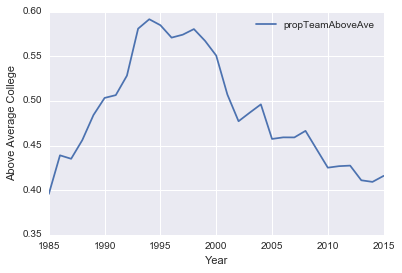

In [105]:
 dataNew_df.plot("yearID", "propTeamAboveAve").set(xlabel="Year", ylabel = "Above Average College")

#### Important note: On the code for question #4 I received substantial help from a forum mentor. He was kind enough to go back and forth with me about 15 times, so that I now understand all of the code. 


#### Conclusions
- Overall, it is interesting that the percentage started at 39.57% in 1985, increased to its all-time high of 59.14% in 1994 and then dropped back to 41.6% (close to where it started) in 2015. 
- It is not possible to make any conclusions on this data but it is nonetheless interesting and it raises more questions. 
- Does the path to the major leagues go in cycles? Maybe the minor leagues (the alternative to college baseball) and college baseball oscillate in their usefulness in getting players to the majors? 
- Maybe when looking at all players in the majors, as opposed to those earning above the mean salary, the data would look different -- though my hypothesis would be that it wouldn't differ too much.  
- It is also important to notice that the highest-ever level is 59.14%, so even when college players made up that high of a proportion there was still 40% -- a large portion of the group -- that hadn't gone to college. 
- For those aspiring baseball players looking to earn their fortunes in the major leagues this chart could be one datapoint on making a decision to advance their career either in college or in the minor leagues. 



### Overall Conclusions
- The most interesting finding of the analyses above is the increase -- and subsequent decrease -- of the proportion of college players who comprise those earning more than the mean salary. I wonder why the data spiked and then reverted to what it was at the starting point? 
- Clearly, this analysis indicates there is a lot of room for additional exploration of the data. 
- The most interesting finding in the analysis is that the percentage of above average earners who attended college started at 39.57% in 1985, increased to its all-time high of 59.14% in 1994, and then dropped back to 41.6% (close to where it started) in 2015. 
- It was also intersting to note that the correlation between average put outs and average salaries was close to 0 (r = -3.23478092503e-18). This finding helped support an intuitive notion that overall average put outs do not have a relationship with overall salaries. 
- An interesting possible additional test would be a One-way ANOVA that compares the average salaries of three different groups of players: pitchers, outfielders, and infielders (including catchers). 

##### Limitations of the Analysis:

- Several limitations to the analysis exist. 
- It would have been useful for the analysis of salaries to have data on the overall income of major league baseball clubs. This data is most-likely proprietary to the repsective clubs but it would have been very intersting to compare how the increase in player salaries compared to the increase in club revenue/income. 
- The salary data was not perfect because it was not inflation-adjusted or put in terms of today's dollars. This makes the data less accurate. 
- In general, when doing a statistical analysis it is important to realize there are always exceptions to the rules. Statistics can be helpful but they can also be misleading so other qualitative data points also need to be taken into account when making some decisions. 
- Without doing statistical testing it is impossible to gauge cuasation and effect sizes. We can understand correlation, but correlation is noy causation. 